# Regression notebook for USA

In [13]:
from utils import plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading data

In [14]:
explanatory = pd.read_excel("../data/clean/worldbank_data_usa_clean.xlsx")
explanatory = explanatory.drop(columns=["Military expenditure (current USD)"])
usa_gdp = pd.read_excel("../data/GDP_data.xlsx")["USA"]

### Dropping military expenditure as a column

In [15]:
explanatory["Unnamed: 0"] = explanatory["Unnamed: 0"].apply(lambda x: x.split()[0])

In [16]:
explanatory

,Unnamed: 0,Natural Log of GDP per capita (current US$),Gross domestic savings (current US$),"Labor force, total","Net trade in goods and services (BoP, current US$)",Consumer price index (2010 = 100),"Foreign direct investment, net (BoP, current US$)"
0,1990,10.081157,1205964000000,127352631,-80852000000,59.919760,-11290000000
1,1991,10.099969,1209823000000,128277990,-31180000000,62.457341,14720000000
2,1992,10.143252,1274385000000,130387356,-39207100000,64.349061,28460000000
3,1993,10.180638,1333535000000,131792391,-70311000000,66.248425,32570000000
4,1994,10.229002,1458170000000,134076659,-98511000000,67.975813,34050000000
5,1995,10.264334,1535416000000,135975697,-96387000000,69.882820,40980000000
6,1996,10.307876,1655638000000,138055157,-104035000000,71.931229,5360000000
7,1997,10.356445,1820236457000,140577814,-108288000000,73.612758,-770000000
8,1998,10.399819,1917962202000,142198651,-166130000000,74.755433,-36390000000
9,1999,10.449161,1995989489000,144105404,-255813000000,76.391102,-64964000000


## Plotting GDP over time

Text(0.5, 0, 'Year')

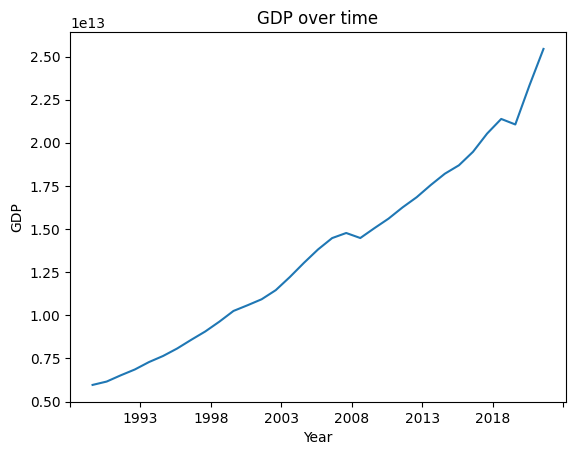

In [17]:
fig, ax = plt.subplots()
ax.plot(explanatory["Unnamed: 0"], usa_gdp)
ax.title.set_text("GDP over time")
ax.set_ylabel("GDP")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.set_xlabel("Year")

## Plotting variables over time

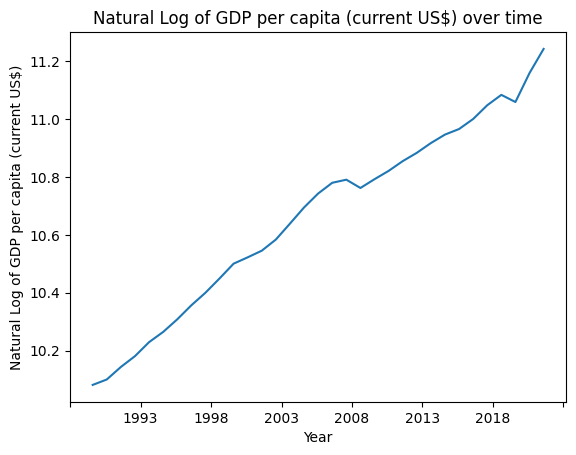

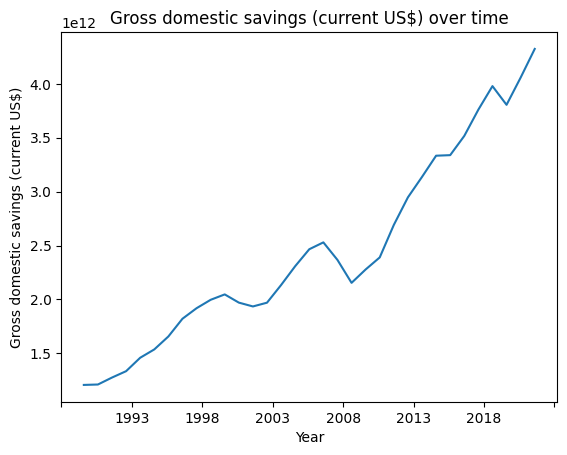

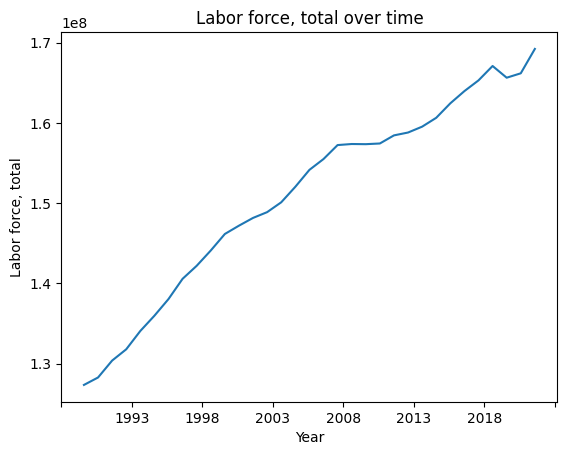

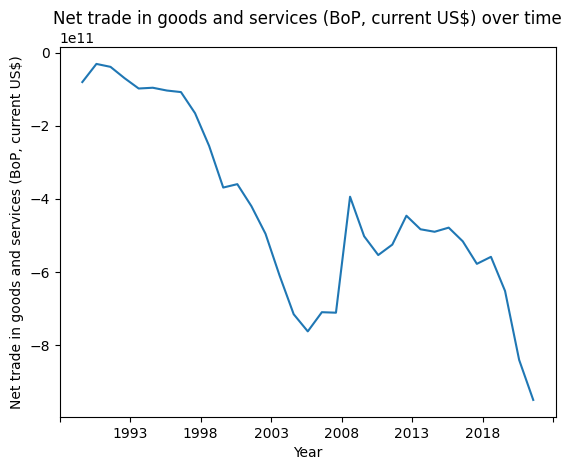

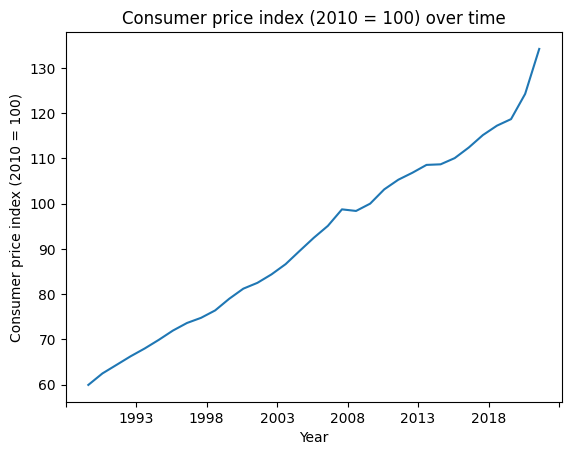

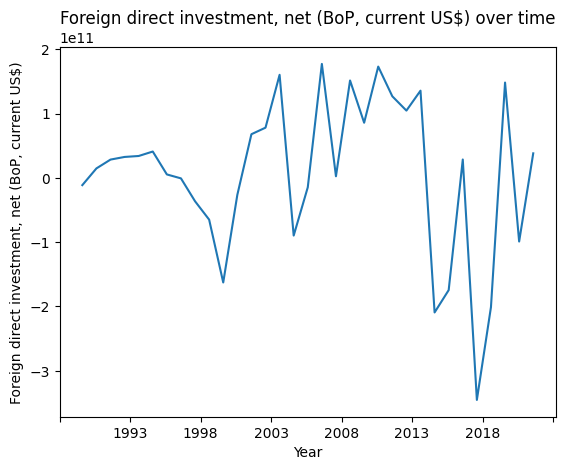

In [18]:
plots.create_plots(explanatory)